In [1]:
import qiskit
import sys
sys.path.append('../..')
from methods import execute_circuits
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer
import warnings

In [2]:
qr = qiskit.QuantumRegister(5)
cr = qiskit.ClassicalRegister(5)
#2,3,4 - control, 1 - target, 0 - ancillae

In [3]:
def ccnot(control1, control2, target):
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.ccx(qr[control1], qr[control2], qr[target])
    return(circuit)

In [4]:
def rtof3(control1,control2,target):
    rtof=qiskit.QuantumCircuit(qr, cr)
    rtof.h(qr[target])
    rtof.t(qr[target])
    rtof.cx(qr[control2],qr[target])
    rtof.tdg(qr[target])
    rtof.cx(qr[control1],qr[target])
    rtof.t(qr[target])
    rtof.cx(qr[control2],qr[target])
    rtof.tdg(qr[target])
    rtof.h(qr[target])
    return(rtof)

In [5]:
measure_all=qiskit.QuantumCircuit(qr, cr)
measure_all.measure(qr,cr)

In [14]:
rtof4=rtof3(2,3,0)+ccnot(0,4,1)+rtof3(2,3,0)

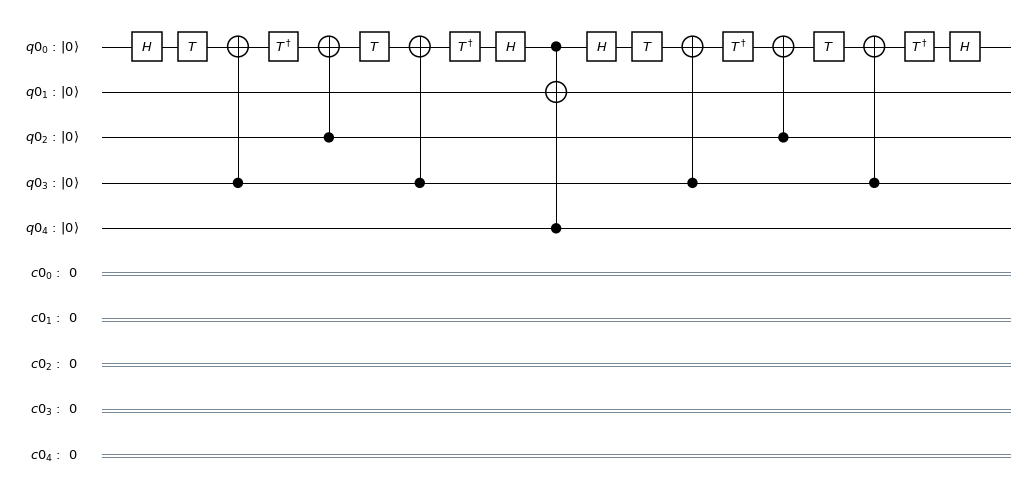

In [15]:
drawer(rtof4)
rtof4 = rtof4+measure_all

In [8]:
def prepare_state(state):
    prepare=qiskit.QuantumCircuit(qr, cr)
    for i in range(4):
        if(state[i]=='1'):
            prepare.x(qr[4-i])
    return(prepare)

In [9]:
def expected_cccnot(state):
    if(state[:3]=='111'):
        return('111'+str(int(not(bool(int(state[3]))))))
    return(state)

In [10]:
states = ['{0:04b}'.format(x) for x in range(2**4)]

In [11]:
warnings.filterwarnings('ignore')
for state in states:
    print('state: '+state)
    print('expected outcome: '+expected_cccnot(state)+'0')
    circuit=prepare_state(state)+rtof4+measure_all
    result = execute_circuits(circuit, 'qasm_simulator').result().get_data()
    print(result)
    result = list(result['counts'])[0]
    print('measured state: '+ result)
    print('correct? '+str(result==expected_cccnot(state)+'0'))
    print('\n')

state: 0000
expected outcome: 00000
{'counts': {'00000': 1024}}
measured state: 00000
correct? True


state: 0001
expected outcome: 00010
{'counts': {'00010': 1024}}
measured state: 00010
correct? True


state: 0010
expected outcome: 00100
{'counts': {'00100': 1024}}
measured state: 00100
correct? True


state: 0011
expected outcome: 00110
{'counts': {'00110': 1024}}
measured state: 00110
correct? True


state: 0100
expected outcome: 01000
{'counts': {'01000': 1024}}
measured state: 01000
correct? True


state: 0101
expected outcome: 01010
{'counts': {'01010': 1024}}
measured state: 01010
correct? True


state: 0110
expected outcome: 01100
{'counts': {'01100': 1024}}
measured state: 01100
correct? True


state: 0111
expected outcome: 01110
{'counts': {'01110': 1024}}
measured state: 01110
correct? True


state: 1000
expected outcome: 10000
{'counts': {'10000': 1024}}
measured state: 10000
correct? True


state: 1001
expected outcome: 10010
{'counts': {'10010': 1024}}
measured state: 10